# TABLE OF CONTENT
Data Acquisition

Identify and handle missing values

Data Standardization

Data Normalization

Binning

Analyzing Individual Feature Patterns using Visualization

Model Development

  a)Linear Regression and Multiple Linear Regression

  b)Model Evaluation using Visualization

  c)Polynomial Regression and Pipeline

  d)Measures for Insample Evaluation

  e)Prediction and Decision Making

  f)Model Evaluation and Refinement

Conclusion

Reference

# import required libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from ipywidgets import interact, interactive, fixed, interact_manual

# load and read the data

In [2]:
df = pd.read_csv('Automobile price data _Raw_.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450



# view column names

In [3]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

As we can see, several question marks appeared in the dataframe; those are missing values which may hinder our further analysis.

So, how do we identify all those missing values and deal with them?
How to work with missing data?

Steps for working with missing data:

01.identify missing data

02.deal with missing data

03.correct data format

we need to replace the "?" symbol with NaN so the dropna() can remove the missing values

In [4]:
df=df.replace('?',np.NaN)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470



<div class="alert alert-block alert-info" style="margin-top: 20px">
Identify_missing_values

<h4>Evaluating for Missing Data</h4>

The missing values are converted to default. We use the following functions to identify these missing values. There are two methods to detect missing data:

<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.
</div>

In [5]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False



<div class="alert alert-block alert-info" style="margin-top: 20px">
<b><code>True</code> stands for missing value, while <code>False</code> stands for not missing value.</b>
<h4><code>Count missing values in each column</code></h4>
<p>
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value, "False"  means the value is present in the dataset.  In the body of the for loop the method  ".value_counts()"  counts the number of "True" values. 
</p>
</div>

In [6]:
for column in missing_data.columns:
    print(column)
    print (missing_data[column].value_counts())
    print("")    

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa


<div class="alert alert-block alert-info" style="margin-top: 20px">
<b> Based on the summary above, each column has 205 rows of data, seven columns containing missing data:</b>
<ol>
    <li>"normalized-losses": 41 missing data</li>
    <li>"num-of-doors": 2 missing data</li>
    <li>"bore": 4 missing data</li>
    <li>"stroke" : 4 missing data</li>
    <li>"horsepower": 2 missing data</li>
    <li>"peak-rpm": 2 missing data</li>
    <li>"price": 4 missing data</li>
</ol>
</div>

### `Deal with missing data`
<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<b>How to deal with missing data?</b>

<ol>
    <li>drop data<br>
        a. drop the whole row<br>
        b. drop the whole column
    </li>
    <li>replace data<br>
        a. replace it by mean<br>
        b. replace it by frequency<br>
        c. replace it based on other functions
    </li><br>
    
Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

<b>Replace by mean:</b>

<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>

<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four". 
        <ul>
            <li>Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>

<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us</li>
        </ul>
    </li>
</ul>

</ol>
</div>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<b>Replace by mean:</b>
</div>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<b>"normalized-losses": 41 missing data, replace them with mean</b>
</div>

In [7]:
# Calculate the average of the column
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

#Replace "NaN" by mean value in "normalized-losses" column
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

Average of normalized-losses: 122.0


<div class="alert alert-block alert-info" style="margin-top: 20px">
<b>"bore": 4 missing data, replace them with mean</b>
</div>

In [8]:
#Calculate the mean value for 'bore' column
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

#Replace NaN by mean value
df["bore"].replace(np.nan, avg_bore, inplace=True)

Average of bore: 3.3297512437810957


<div class="alert alert-block alert-info" style="margin-top: 20px">
<b>"stroke": 4 missing data, replace them with mean</b>
</div>

In [9]:
#Calculate the mean vaule for "stroke" column
avg_stroke = df["stroke"].astype("float").mean(axis = 0)
print("Average of stroke:", avg_stroke)

#Replace "stroke" by mean value
df["stroke"].replace(np.nan, avg_stroke, inplace = True)

Average of stroke: 3.2554228855721337


<div class="alert alert-block alert-info" style="margin-top: 20px">
<b>"peak-rpm": 2 missing data, replace them with mean</b>
</div>

In [10]:
#Calculate the mean vaule for "peak-rpm" column
avg_peak_rpm = df["peak-rpm"].astype("float").mean(axis = 0)
print("Average of peak-rpm:", avg_peak_rpm)

#Replace "peak-rpm" by mean value
df["peak-rpm"].replace(np.nan, avg_peak_rpm, inplace = True)

Average of peak-rpm: 5125.369458128079


<div class="alert alert-block alert-info" style="margin-top: 20px">
<b>"horsepower": 2 missing data, replace them with mean</b>
</div>

In [11]:
#Calculate the mean vaule for "horsepower" column
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

#Replace "horsepower" by mean value
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

Average horsepower: 104.25615763546799


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<b>Replace by frequency:</b>
</div>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<b>"num-of-doors": 2 missing data</b>
</div>

**To see which values are present in a particular column, we can use the `.value_counts()` method:**

In [12]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

**We can see that four doors are the most common type. We can also use the `.idxmax()` method to calculate for us the most common type automatically:**

In [13]:
df['num-of-doors'].value_counts().idxmax()

'four'

**The replacement procedure is very similar to what we have seen previously**

In [14]:
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)

<div class="alert alert-block alert-info" style="margin-top: 20px">
<b>Finally, let's drop all rows that do not have price data:</b>
</div>

In [15]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [16]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h3 id="correct_data_format"><code>Correct data format</code></h3>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<b>We are almost there!</b>
<p>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>

<h3><code>Data Types</code></h3>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<p>
Data has a variety of types.<br>
The main types stored in Pandas dataframes are <b>object</b>, <b>float</b>, <b>int</b>, <b>bool</b> and <b>datetime64</b>. In order to better learn about each attribute, it is always good for us to know the data type of each column. In Pandas:
</p>
</div>
In Pandas, we use 

<p><b>.dtype()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>
</div>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<b>Lets list the data types for each column</b>
</div>

In [17]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<div class="alert alert-block alert-info" style="margin-top: 20px">
<p>As we can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. For example, <code>'bore' and 'stroke' variables are numerical values that describe the engines, so we should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'</code>. We have to convert data types into a proper format for each column using the <code>astype()</code> method.</p> 
</div>

In [18]:
#Convert data types to proper format
df[["bore", "stroke","price","peak-rpm"]] = df[["bore", "stroke","price","peak-rpm"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")

**Let us list the columns after the conversion**

In [19]:
df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Columns: 26 entries, symboling to price
dtypes: float64(9), int32(1), int64(5), object(11)
memory usage: 40.2+ KB


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int32  
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

<div class="alert alert-block alert-info" style="margin-top: 20px">
<b>Wonderful!</b>

Now, we finally obtain the cleaned dataset with no missing values and all data in its proper format. 
</div>

<h2 id="data_standardization"><code>Data Standardization</code></h2>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<p>
Data is usually collected from different agencies with different formats.
(Data Standardization is also a term for a particular type of data normalization, where we subtract the mean and divide by the standard deviation)
</p>
    
<b>What is Standardization?</b>
<p>Standardization is the process of transforming data into a common format which allows the researcher to make the meaningful comparison.
</p>

<b>Example</b>

<p>Transform mpg to L/100km:</p>
<p>In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accept the fuel consumption with L/100km standard</p>
<p>We will need to apply <b>data transformation</b> to transform mpg into L/100km?</p>
    
<p>The formula for unit conversion is<p>
L/100km = 235 / mpg
<p>We can do many mathematical operations directly in Pandas.</p></div>

In [21]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]
df["highway-L/100km"] = 235/df["highway-mpg"]

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


<h2 id="data_normalization"><code>Data Normalization</code></h2>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<b>Why normalization?</b>

<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1
</p>

<b>Example</b>

<p>To demonstrate normalization, let's say we want to scale the columns "length", "width" and "height" </p>
<p><b>Target:</b>would like to Normalize those variables so their value ranges from 0 to 1.</p>
<p><b>Approach:</b> replace original value by (original value)/(maximum value)</p>

</div>

In [22]:
df[["length","width","height"]].head() # these values vary highly w.r.t rest column values

,length,width,height
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3


In [23]:
# replace (original value) by (original value)/(maximum value) -> Simple Feature Scaling
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

# show the scaled columns
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


<h2 id="binning"><code>Binning</code></h2>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.
</p>

<b>Example: </b>

<p>In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, it has 57 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis? </p>

<p>We will use the Pandas method 'cut' to segment the 'horsepower' column into 3 bins </p>
</div>

<h3>Example of Binning Data In Pandas</h3> Convert data to correct format 

Lets plot the histogram of horspower, to see what the distribution of horsepower looks like.

Text(0.5, 1.0, 'horsepower bins')

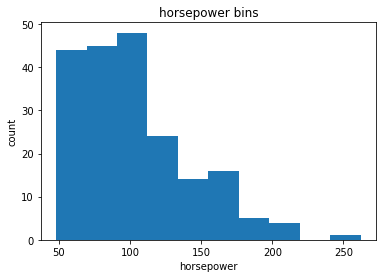

In [24]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)
plt.hist(df["horsepower"])

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<p>We would like 3 bins of equal size bandwidth so we use numpy's <code>linspace(start_value, end_value, numbers_generated)</code> function.</p>
<p>Since we want to include the minimum value of horsepower we want to set start_value=min(df["horsepower"]).</p>
<p>Since we want to include the maximum value of horsepower we want to set end_value=max(df["horsepower"]).</p>
<p>Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated=4.</p>
</div>

**We build a bin array, with a minimum value to a maximum value, with bandwidth calculated above. The bins will be values used to determine when one bin ends and another begins.**

In [25]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

**We set group  names:**

In [26]:
group_names = ['Low', 'Medium', 'High']

**We apply the function `cut` that determine what each value of `df['horsepower']` belongs to.**

In [27]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )

#Lets see the number of vehicles in each bin
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

**Lets plot the distribution of each bin.**

Text(0.5, 1.0, 'horsepower bins')

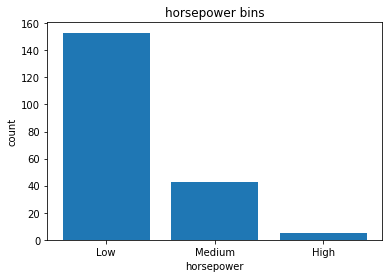

In [28]:
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

**Check the dataframe above carefully, we will find the last column provides the bins for "horsepower" with 3 categories ("Low","Medium" and "High")**

<h3>Bins visualization</h3>
Normally, a histogram is used to visualize the distribution of bins we created above. 

Text(0.5, 1.0, 'horsepower bins')

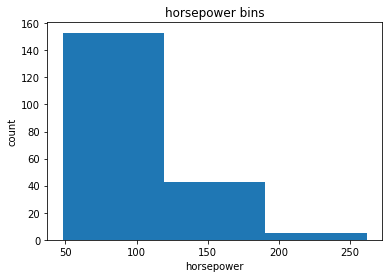

In [29]:
# draw historgram of attribute "horsepower" with bins = 3
plt.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

<h2 id="indicator"><code>Indicator variable (or dummy variable)</code></h2>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why we use indicator variables?</b>

<p>
    So we can use categorical variables for regression analysis in the later modules.
</p>
<b>Example</b>
<p>
    We see the column "fuel-type" has two unique values, "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" into indicator variables.
</p>

<p>
    We will use the panda's method 'get_dummies' to assign numerical values to different categories of fuel type. 
</p>

</div>

In [30]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.sample(5)

,diesel,gas
189,0,1
147,0,1
100,0,1
124,0,1
35,0,1


**change column names for clarity**

In [31]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head(5)

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


**In the dataframe, column fuel-type has a value for 'gas' and 'diesel'as 0s and 1s now**

In [32]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [33]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,13495.0,11.190476,8.703704,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,16500.0,11.190476,8.703704,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102,5500.0,24,30,13950.0,9.791667,7.833333,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115,5500.0,18,22,17450.0,13.055556,10.681818,Low,0,1


**Repeat for `aspiration` column**

In [34]:
# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiration'])

# change column names for clarity
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [35]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "fuel-type" from "df"
df.drop("aspiration", axis = 1, inplace=True)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0


# `Analyzing Individual Feature Patterns using Visualization`

<div class="alert alert-body alert-info" style="margin-top: 20px">
<code>How to choose the right visualization method?</code><br>
When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.
</div>

In [36]:
# list the data types for each column
print(df.dtypes)

symboling               int64
normalized-losses       int32
make                   object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int32
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
city-L/100km          float64
highway-L/100km       float64
horsepower-binned    category
fuel-type-diesel        uint8
fuel-type-gas           uint8
aspiration-std          uint8
aspiration-turbo        uint8
dtype: object


<h2><code>1. Continuous numerical variables:</code></h2>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<p>Continuous numerical variables are variables that may contain any value within some range. Continuous numerical variables can have the type <code>int64</code> or <code>float64</code>. A great way to visualize these variables is by using scatterplots with fitted lines.</p>

<p>In order to start understanding the (linear) relationship between an individual variable and the price. We can do this by using "regplot", which plots the scatterplot plus the fitted regression line for the data.</p>
</div>

<h4><code>Positive linear relationship</code></h4>

<div class="alert alert-body alert-info" style="margin-top: 20px">
Let's find the scatterplot of "engine-size" and "price"
</div>

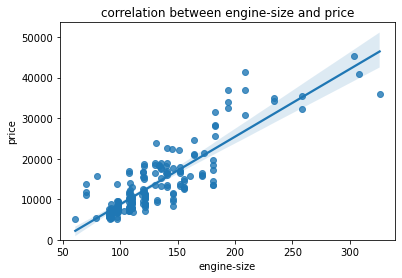

In [37]:
sns.regplot(x = 'engine-size', y = 'price', data = df)
plt.ylim(0,) # y axis starts from zero
plt.title("correlation between engine-size and price")
plt.show()

**As the `engine-size goes up, the price goes up: this indicates a positive direct correlation` between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.We can examine the correlation between engine-size and price and see it's approximately `0.87`**

<div class="alert alert-body alert-info" style="margin-top: 20px">
we can calculate the correlation between variables of type <code>int64</code> or <code>float64</code> using the method <code>corr</code>: The diagonal elements are always one
</div>

In [38]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<div class="alert alert-body alert-info" style="margin-top: 20px">
Highway mpg is a potential predictor variable of price
</div>

**`Highway MPG`: the average a car will get while driving on an open stretch of road without stopping or starting, typically at a higher speed. `City MPG`: the score a car will get on average in city conditions, with stopping and starting at lower speeds.**

correlation between highway-mpg and price 


,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


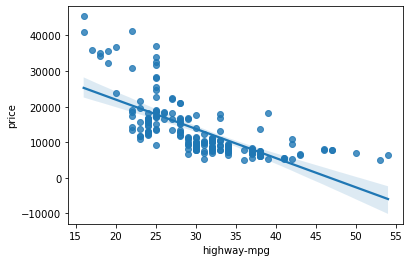

In [39]:
sns.regplot(x = 'highway-mpg', y = 'price',data = df)
print('correlation between highway-mpg and price ')
df[['highway-mpg', 'price']].corr()

**As the `highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship` between these two variables. Highway mpg could potentially be a predictor of price.We can examine the correlation between highway-mpg and price and see it's approximately `-0.704`**

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
Weak Linear Relationship
</div>

<div class="alert alert-body alert-info" style="margin-top: 20px">
Let's see if <code>Peak-rpm</code> as a predictor variable of <code>price</code>
</div>

correlation between peak-rpm and price 


,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


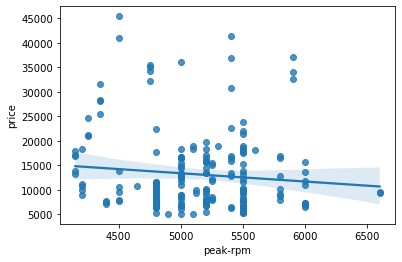

In [40]:
sns.regplot(x = 'peak-rpm', y = 'price', data = df)
print('correlation between peak-rpm and price ')
df[['peak-rpm','price']].corr()

**`Peak rpm does not seem like a good predictor of the price at all` since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's it is not a reliable variable.We can examine the `correlation` between peak-rp and price and see it's approximately `-0.101616`**

<div class="alert alert-body alert-info" style="margin-top: 20px">
Let's see if <code>stroke</code> as a predictor variable of <code>price</code>
</div>

correlation between strike and prce :


,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


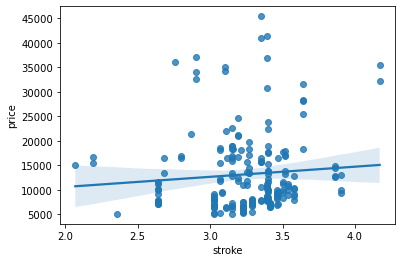

In [41]:
print('correlation between strike and prce :')

# correlation results between "price" and "stroke" do you expect a linear relationship?
sns.regplot(x = 'stroke', y = 'price', data = df)

# correlation between x="stroke", y="price".
df[['stroke','price']].corr()

**`Stroke does not seem like a good predictor of the price at all` since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's it is not a reliable variable.We can examine the `correlation` between stroke and price and see it's approximately `0.08`**

<h3><code>2. Categorical variables</code></h3>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<p>These are variables that describe a <code>characteristic</code> of a data unit, and are selected from a small group of categories. The categorical variables can have the type <code>object</code> or <code>int64</code>. A good way to visualize categorical variables is by using boxplots.
</div>

<AxesSubplot:xlabel='body-style', ylabel='price'>

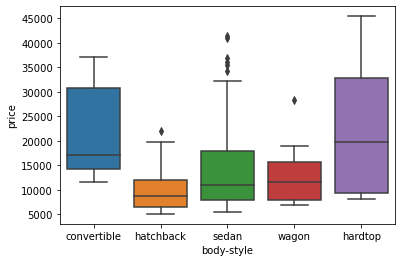

In [42]:
sns.boxplot(x="body-style", y="price", data=df)

**We see that the distributions of price between the different body-style categories have a significant overlap, and so body-style would not be a good predictor of price.**

<div class="alert alert-body alert-info" style="margin-top: 20px">
Let's examine if <code>engine-location</code> as a predictor variable of <code>price</code> :
</div>

<AxesSubplot:xlabel='engine-location', ylabel='price'>

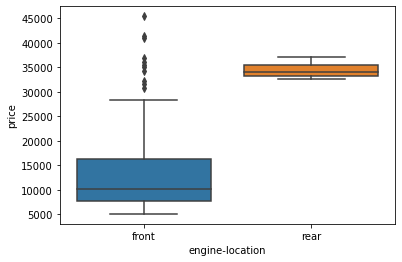

In [43]:
sns.boxplot(x = 'engine-location', y = 'price', data = df)

**Here we see that the distribution of price between these two `engine-location` categories, front and rear, are distinct enough to take engine-location as a `potential good predictor of price`.**

<div class="alert alert-body alert-info" style="margin-top: 20px">
Let's examine if <code>drive-wheels</code> as a predictor variable of <code>price</code> :
</div>

**A `drive wheel` is a wheel of a motor vehicle that transmits force, transforming torque into tractive force from the tires to the road, causing the vehicle to move.**

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

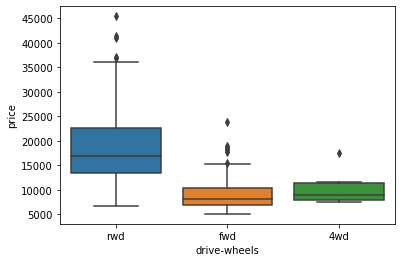

In [44]:
sns.boxplot(x = 'drive-wheels', y = 'price', data = df)

**Here we see that the distribution of price between the different drive-wheels categories differs; as such `drive-wheels could potentially be a predictor of price.`**

<h3><code>3. Descriptive Statistical Analysis</code></h3>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<p>Let's first take a look at the variables by utilizing a description method.</p>

<p>The <b>describe</b> function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.</p>

This will show:

<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li> 
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>
</div>
<b>We can apply the method <code>describe</code> as follows:</b>

In [45]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,...,5117.665368,25.179104,30.686567,13207.129353,9.944145,8.044957,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,...,478.113805,6.423220,6.815150,7947.066342,2.534599,1.840739,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,...,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,...,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,...,5125.369458,24.000000,30.000000,10295.000000,9.791667,7.833333,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,...,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500,1.000000,1.000000,1.000000,1.000000


<div class="alert alert-body alert-info" style="margin-top: 20px">
The default setting of describe skips variables of type object. We can apply the method <code>describe</code> on the variables of type <code>object</code> as follows:
</div>

In [46]:
df.describe(include = ['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,198,145,157,92


<div class="alert alert-body alert-info" style="margin-top: 20px">
 We can apply the method <code>describe</code> on the variables of type <code>all datatypes</code> as follows:
</div>

In [47]:
df.describe(include = 'all')

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201,201,201,201,201,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201,201.000000,201.000000,201.000000,201.000000
unique,NaN,NaN,22,2,5,3,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,four,sedan,fwd,front,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,115,94,118,198,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,153,NaN,NaN,NaN,NaN
mean,0.840796,122.00000,NaN,NaN,NaN,NaN,NaN,98.797015,0.837102,0.915126,...,25.179104,30.686567,13207.129353,9.944145,8.044957,NaN,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,NaN,NaN,NaN,NaN,NaN,6.066366,0.059213,0.029187,...,6.423220,6.815150,7947.066342,2.534599,1.840739,NaN,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,NaN,NaN,NaN,NaN,NaN,86.600000,0.678039,0.837500,...,13.000000,16.000000,5118.000000,4.795918,4.351852,NaN,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,NaN,NaN,NaN,NaN,NaN,94.500000,0.801538,0.890278,...,19.000000,25.000000,7775.000000,7.833333,6.911765,NaN,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,NaN,NaN,NaN,NaN,NaN,97.000000,0.832292,0.909722,...,24.000000,30.000000,10295.000000,9.791667,7.833333,NaN,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,NaN,NaN,NaN,NaN,NaN,102.400000,0.881788,0.925000,...,30.000000,34.000000,16500.000000,12.368421,9.400000,NaN,0.000000,1.000000,1.000000,0.000000


<h3><code>Value Counts</code></h3>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
Value-counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the <code>value_counts</code> method on the column 'drive-wheels'. Don’t forget the method <code>value_counts</code> only works on Pandas series, not Pandas Dataframes. As a result, we only include one bracket <code>df['drive-wheels']</code> not two brackets <code>df[['drive-wheels']]</code>.
</div>

In [48]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

**We can convert the series to a Dataframe as follows :**

In [49]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


**Let's repeat the above steps but save the results to the dataframe `drive_wheels_counts` and rename the column `drive-wheels` to `value_counts`.**

**A vehicle's drive wheel is the wheel and tire assembly that actually pushes or pulls the vehicle down the road.The four different types of drivetrain are all-wheel-drive (AWD), front wheel drive (FWD), rear wheel drive (RWD), and 4WD (4 wheel drive). ([more](https://www.drivespark.com/off-beat/car-drivetrain-systems-explained-022723.html))**

In [50]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels' # Now let's rename the index to 'drive-wheels':
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


**We can repeat the above process for the variable `engine-location`.**

In [51]:
engine_location_counts = df['engine-location'].value_counts().to_frame()
engine_location_counts.rename(columns = {'engine-location' : 'value_counts'}, inplace = True)
engine_location_counts.index.name = 'engine-location'
engine_location_counts

,value_counts
engine-location,
front,198
rear,3


**Examining the value counts of the `engine location` would `not be a good predictor` variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, this `result is skewed`. Thus, we are not able to draw any conclusions about the engine location.**

<h3><code>4.Basics of Grouping</code></h3>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<p>The <code>groupby</code> method groups data by different categories. The data is grouped based on one or several variables and analysis is performed on the individual groups.</p>
    <p>For example, let's group by the variable <code>drive-wheels</code>. We see that there are 3 different categories of drive wheels.</p>
</div>

In [52]:
df["drive-wheels"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

<div class="alert alert-body alert-info" style="margin-top: 20px">
<p>If we want to know, on average, which type of drive wheel is most valuable, we can group <code>drive-wheels</code> and then average them.</p>

<p>We can select the columns <code>drive-wheels</code>, <code>body-style</code> and <code>price</code>, then assign it to the variable <code>df_group_one</code>.</p>
    We can then calculate the average price for each of the different categories of data.
</div>

In [53]:
df_group_one = df[['drive-wheels', 'body-style', 'price']]
df_group_one = df_group_one.groupby(['drive-wheels'],as_index = False).mean() # if not passes as_index False it will make drive wheels as index
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


<div class="alert alert-body alert-info" style="margin-top: 20px">
    <p>From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.</p>

<p>You can also group with multiple variables. For example, let's group by both <code>drive-wheels</code> and <code>body-style</code>. This groups the dataframe by the unique combinations <code>drive-wheels</code> and <code>body-style</code>. We can store the results in the variable 'grouped_test1'.</p>
</div>

In [54]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


<img src = "https://infovisual.info/storage/app/media/05/img_en/006%20Types%20of%20bodies.jpg">

<div class="alert alert-body alert-info" style="margin-top: 20px">
    This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot " to create a pivot table from the groups.
<br>
    
In this case, we will leave the drive-wheel variable as the rows of the table, and pivot body-style to become the columns of the table:
</div>

In [55]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

**Often, we won't have data for some of the pivot cells. We can fill these missing cells with the value 0, but any other value could potentially be used as well. It should be mentioned that missing data is quite a complex subject and is an entire course on its own. For simplicity, let's assign them 0**

In [56]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<div class="alert alert-body alert-info" style="margin-top: 20px">
    Use the <code>groupby</code> function to find the average <code>price</code> of each car based on <code>body-style</code> ?
</div>

In [57]:
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h4><code>Variables: Drive Wheels and Body Style vs Price</code></h4> 
</div>

<div class="alert alert-body alert-info" style="margin-top: 20px">
    Let's use a heat map to visualize the relationship between Body Style vs Price.
</div>

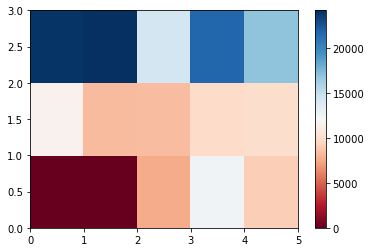

In [58]:
plt.pcolor(grouped_pivot, cmap = 'RdBu')
plt.colorbar() # show vertical range
plt.show()

<div class="alert alert-body alert-info" style="margin-top: 20px">
The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' in the vertical and horizontal axis respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.

    
<code>The default labels convey no useful information to us. Let's change that:</code>
</div>

In [59]:
grouped_pivot.index

Index(['4wd', 'fwd', 'rwd'], dtype='object', name='drive-wheels')

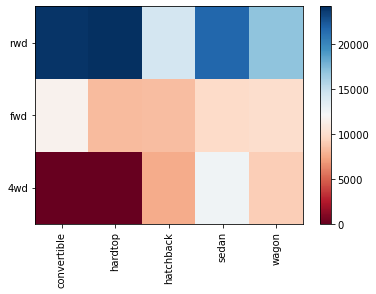

In [60]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1] # accesing "body-type" from grouped.pivot
col_labels = grouped_pivot.index # # accesing "drive-wheels" from grouped.pivot

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

### `5. Correlation and Causation`
<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>

<p3>Pearson Correlation</p>

<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Total positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Total negative linear correlation.</li>
</ul></div>

In [61]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,...,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.029807,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,...,0.239543,-0.225016,-0.181877,0.133999,0.238567,0.181189,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,...,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.577576,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,...,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.707108,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,...,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,...,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.084301,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,...,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.836921,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,...,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.783465,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.559112,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,...,-0.063561,-0.033956,-0.034636,0.082269,0.036133,0.047089,0.241064,-0.241064,-0.218233,0.218233


<div class="alert alert-body alert-info" style="margin-top: 20px">
    sometimes we would like to know the significant of the correlation estimate.<br>
    <b>P-value: 

<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

</b>
</div>

**We can obtain this information using `stats` module in the `scipy` library.**

#### `Wheel-base vs Price`
Let's calculate the Pearson Correlation Coefficient and P-value of `wheel-base` and `price`.

In [62]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5846418222655084  with a P-value of P = 8.076488270732473e-20


**`Conclusion:`**

**Since the p-value is  <  0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585)**

#### `Horsepower vs Price`

**Let's calculate the Pearson Correlation Coefficient and P-value of `horsepower` and `price`.**

In [63]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8096068016571052  with a P-value of P =  6.273536270650862e-48


**`Conclusion:`**

**Since the p-value is  <  0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1)**

#### `Length vs Price`

**Let's calculate the Pearson Correlation Coefficient and P-value of `length` and `price`.**

In [64]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.6906283804483642  with a P-value of P =  8.016477466158759e-30


**`Conclusion:`**

**Since the p-value is  <  0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).**

#### `Width vs Price`

**Let's calculate the Pearson Correlation Coefficient and P-value of `width` and `price`.**

In [65]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522675  with a P-value of P = 9.200335510481123e-38


**`Conclusion:`**

**Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).**

#### `Curb-weight vs Price`

**Let's calculate the Pearson Correlation Coefficient and P-value of `curb-weight` and `price`.**

In [66]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702846  with a P-value of P =  2.1895772388936914e-53


**`Conclusion:`**

**Since the p-value is  <  0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834)**

#### `Engine-size vs Price`

**Let's calculate the Pearson Correlation Coefficient and P-value of `engine-size` and `price`.**

In [67]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198389e-64


**`Conclusion:`**

**Since the p-value is  <  0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).**

#### `Bore vs Price`

**Let's calculate the Pearson Correlation Coefficient and P-value of `bore` and `price`.**

In [68]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626604  with a P-value of P =   8.049189483935032e-17


**`Conclusion:`**

**Since the p-value is  <  0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).**

#### `City-mpg vs Price`

**Let's calculate the Pearson Correlation Coefficient and P-value of `city-mpg` and `price`.**

In [69]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844684  with a P-value of P =  2.3211320655672453e-29


**`Conclusion:`**

**Since the p-value is  <  0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of ~ -0.687 shows that the relationship is negative and moderately strong.**

#### `Highway-mpg vs Price¶`

**Let's calculate the Pearson Correlation Coefficient and P-value of `highway-mpg` and `price`.**

In [70]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.7046922650589533  with a P-value of P =  1.7495471144474617e-31


**`Conclusion:`**

**Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of ~ -0.705 shows that the relationship is negative and moderately strong.**

### `6. ANOVA`
<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant is our calculated score value.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.</p>
</div>

**`Drive Wheels`**

**Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.**

**Let's see if different types `drive-wheels` impact `price`, we group the data.**

In [71]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0



**We can obtain the values of the method group using the method `get_group`.**

In [72]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

**we can use the function `f_oneway` in the module `stats` to obtain the F-test score and P-value.**

In [73]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


**This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated?**

**`Separately:`**

In [74]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
print( "fwd and rwd -> ANOVA results: F=", f_val, ", P =", p_val )

f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])     
print( "4wd and rwd -> ANOVA results: F=", f_val, ", P =", p_val) 

f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
print("4wd and fwd -> ANOVA results: F=", f_val, ", P =", p_val)   

fwd and rwd -> ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23
4wd and rwd -> ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333
4wd and fwd -> ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


**Conclusion: `Important Variables`**
<b>
    <p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:

<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>
</b>

---

  ## `7. Model Development`

**`Objectives`**

**Develop prediction models**

**In this section, we will develop several models that will predict the price of the car using the variables or features. This is just an estimate but should give us an objective idea of how much the car should cost.**


**Some questions we want to ask in this module**

* **do I know if the dealer is offering fair value for my trade-in?**
* **do I know if I put a fair value on my car?**
* **Data Analytics, we often use Model Development to help us predict future observations from the data we have.**

**A Model will help us understand the exact relationship between different variables and how these variables are used to predict the result.**

### `1: Linear Regression and Multiple Linear Regression`

<h4><code>Linear Regression</code></h4>
<p>One example of a Data  Model that we will be using is</p>
<b>Simple Linear Regression</b>.

<br>
<p>Simple Linear Regression is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>The predictor/independent variable (X)</li>
    <li>The response/dependent variable (that we want to predict)(Y)</li>
</ul>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>

$$
 Y: Response \ Variable\\
 X: Predictor \ Variables
$$

 <b>Linear function:</b>
$$
Yhat = a + b  X
$$

<ul>
    <li>a refers to the <b>intercept</b> of the regression line0, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>

**Create the linear regression object**

In [75]:
lm = LinearRegression()

**`How could Highway-mpg help us predict car price?`**

 **we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.**

In [76]:
X = df[['highway-mpg']]
Y = df['price']

**Fit the linear model using highway-mpg.**

In [77]:
lm.fit(X,Y)

LinearRegression()

**We can output a prediction**

In [78]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

**What is the value of the intercept (a)?**

In [79]:
lm.intercept_

38423.305858157386

**What is the value of the Slope (b)?**

In [80]:
lm.coef_

array([-821.73337832])

**`What is the final estimated linear model we get?`**

**As we saw above, we should get a final linear model with the structure:**

$$
Yhat = a + b  X
$$

**with actual values we get:** **`price = 38423.31 - 821.73 * highway-mpg`**


**`Train the model using 'engine-size' as the independent variable and 'price' as the dependent variable`**

In [81]:
# Extracting independent variable target variables
lm1 = LinearRegression()

# fit in linear model
lm1.fit( df[['engine-size']], df['price'])

print("What is the value of the intercept (a)? \n {}".format(lm1.intercept_))
print("What is the value of the Slope (b)? \n {}".format(lm1.coef_))
print("\n Final estimated linear model")
print("Yhat=-7963.34 + 166.86*X")
print("Price=-7963.34 + 166.86*engine-size")

What is the value of the intercept (a)? 
 -7963.338906281046
What is the value of the Slope (b)? 
 [166.86001569]

 Final estimated linear model
Yhat=-7963.34 + 166.86*X
Price=-7963.34 + 166.86*engine-size


**`Multiple Linear Regression`**

<p>What if we want to predict car price using more than one variable?</p>

<p>If we want to use more variables in our model to predict car price, we can use <b>Multiple Linear Regression</b>.
Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and <b>two or more</b> predictor (independent) variables.
Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:</p>

$$
Y: Response \ Variable\\
X_1 :Predictor \ Variable \ 1\\
X_2: Predictor\ Variable \ 2\\
X_3: Predictor\ Variable \ 3\\
X_4: Predictor\ Variable \ 4\\
$$

$$
a: intercept\\
b_1 :coefficients \ of\ Variable \ 1\\
b_2: coefficients \ of\ Variable \ 2\\
b_3: coefficients \ of\ Variable \ 3\\
b_4: coefficients \ of\ Variable \ 4\\
$$
**The equation is given by**
$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$


**From the previous section we know that other good predictors of price could be:**

* `Horsepower`
* `Curb-weight`
* `Engine-size`
* `Highway-mpg`

**Let's develop a model using these variables as the predictor variables**

In [82]:
lm3 = LinearRegression() # creating regression variable
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']] # extracting multiple independent variables

#Fit the linear model using the four above-mentioned variables.
lm3.fit(Z, df['price'])
print("What is the value of the intercept (a)? \n {}".format(lm3.intercept_))
print("What are the values of the coefficients (b1, b2, b3, b4)? \n {}".format(lm3.coef_))
print("\n Final estimated linear model")
print(f"\n Price = {lm3.intercept_} + {lm3.coef_[0]}*horsepower + {lm3.coef_[1]}*curb-weight + {lm3.coef_[2]}*engine-size + {lm3.coef_[3]}*highway-mpg")

What is the value of the intercept (a)? 
 -15811.863767729254
What are the values of the coefficients (b1, b2, b3, b4)? 
 [53.53022809  4.70805253 81.51280006 36.1593925 ]

 Final estimated linear model

 Price = -15811.863767729254 + 53.53022808606984*horsepower + 4.708052531299522*curb-weight + 81.51280005759963*engine-size + 36.15939250212034*highway-mpg


**Create and train a Multiple Linear Regression model `lm4` where the response variable is price, and the predictor variable is `normalized-losses` and `highway-mpg`.**

In [83]:
lm4 = LinearRegression()
lm4.fit(df[['normalized-losses','highway-mpg']],df['price']) 
print("What is the value of the intercept (a)? \n {}".format(lm4.intercept_))
print("What are the values of the coefficients (b1, b2, b3, b4)? \n {}".format(lm4.coef_))
print("\n Estimated linear model")
print(f"\n Price = {lm4.intercept_} + {lm4.coef_[0]}*normalized-losses  {lm4.coef_[1]}*highway-mpg ")

What is the value of the intercept (a)? 
 38201.31327245728
What are the values of the coefficients (b1, b2, b3, b4)? 
 [   1.49789586 -820.45434016]

 Estimated linear model

 Price = 38201.31327245728 + 1.4978958634133184*normalized-losses  -820.4543401631864*highway-mpg 


### `2: Model Evaluation using Visualization`

**Now that we've developed some models, how do we evaluate our models and how do we choose the best one? One way to do this is by using visualization.**

### `Regression Plot`

**When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using regression plots.**

**This plot will show a combination of a scattered data points (a scatter plot), as well as the fitted linear regression line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).**

**Let's visualize highway-mpg as potential predictor variable of price:**

(0.0, 48207.72669769239)

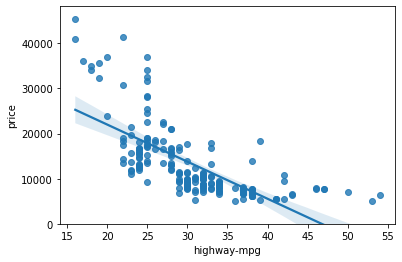

In [84]:
sns.regplot(x = 'highway-mpg', y = 'price',data = df)
plt.ylim(0,)

**We can see from this plot that price is negatively correlated to highway-mpg, since the regression slope is negative. One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data, and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data.** 

### `Residual Plot`
<b>
A good way to visualize the variance of the data is to use a residual plot.

What is a residual?

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

So what is a residual plot?

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

What do we pay attention to when looking at a residual plot?

We look at the spread of the residuals:

- If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.<b>

C:\Users\sree_chandra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


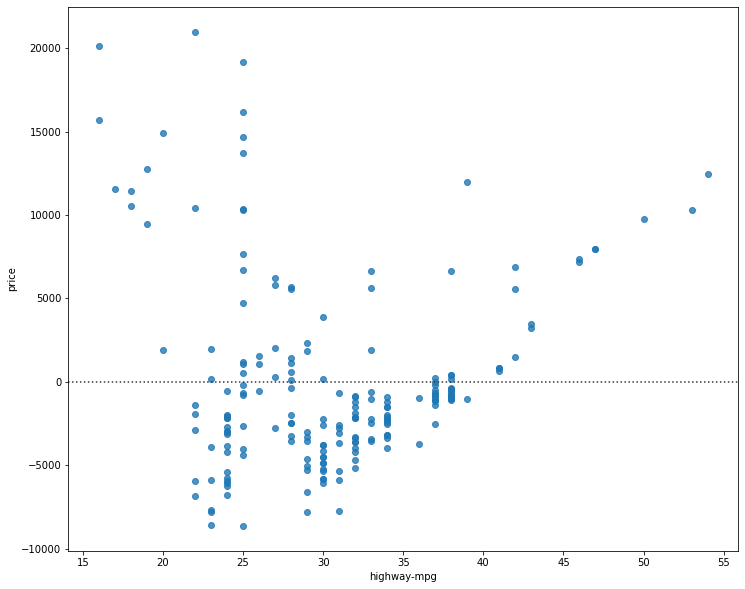

In [85]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

<b>What is this plot telling us?

We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.</b>

### `Multiple Linear Regression`

<b>How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.

One way to look at the fit of the model is by looking at the distribution plot: We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

First lets make a prediction</b>

Simple Linear Regressionn


C:\Users\sree_chandra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\sree_chandra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


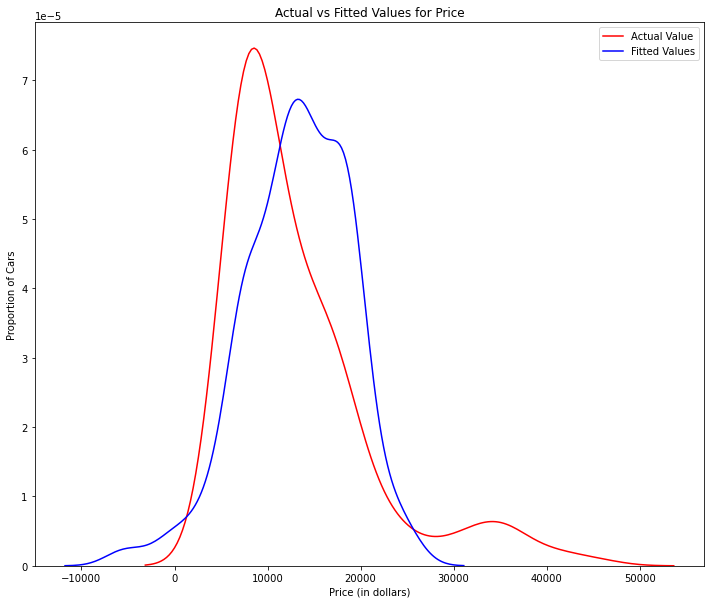

In [86]:
Y_hat = lm.predict(df[['highway-mpg']])
print('Simple Linear Regressionn')

# plot
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r")
sns.distplot(Y_hat, hist=False, color="b", ax=ax1)

plt.legend(["Actual Value","Fitted Values"])
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

Multiple Linear Regression


C:\Users\sree_chandra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\sree_chandra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


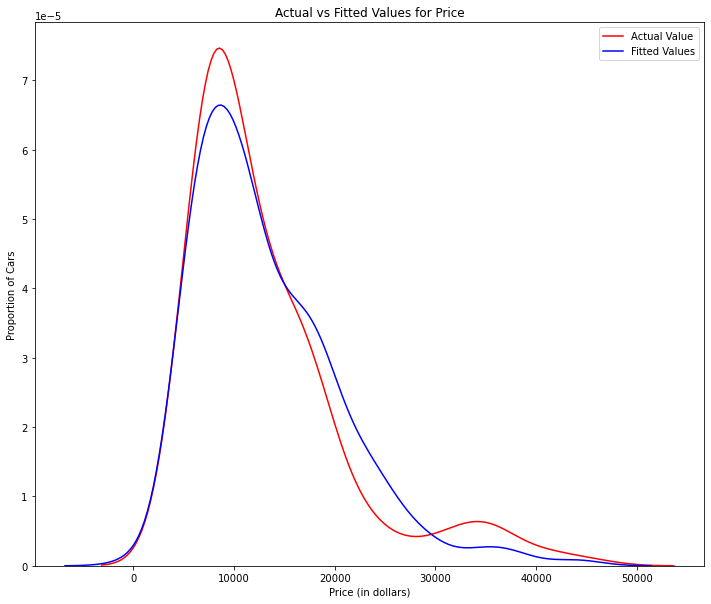

In [87]:
Y_hat = lm3.predict(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
print("Multiple Linear Regression")
# plot
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r")
sns.distplot(Y_hat, hist=False, color="b", ax=ax1)

plt.legend(["Actual Value","Fitted Values"])
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

**We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.**

### ` 3: Polynomial Regression and Pipeline`

<b>Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.

We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

There are different orders of polynomial regression:</b>

<center><b>Quadratic - 2nd order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 
$$

<center><b>Cubic - 3rd order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\
$$

<center><b>Higher order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$

**We saw earlier that a linear model did not provide the best fit while using highway-mpg as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.**

**We will use the following function to plot the data:**

In [88]:
def Polly_Plot(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [89]:
# Lets get the variables
x = df['highway-mpg']
y = df['price']

# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


**Let's plot the function**

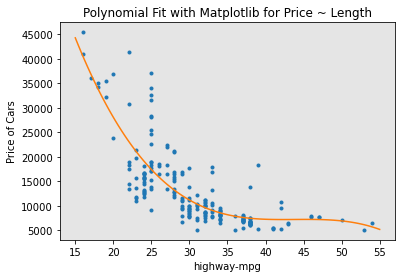

In [90]:
Polly_Plot(p, x, y, 'highway-mpg')

**We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function `hits` more of the data points.**

**`Create 11 order polynomial model` with the variables x and y from above**

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


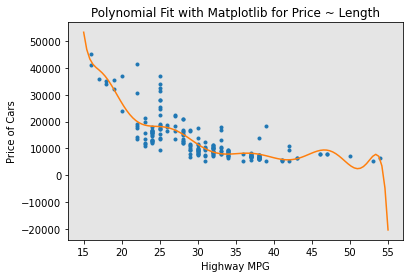

In [91]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
Polly_Plot(p1,x,y, 'Highway MPG')

**The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2)polynomial with two variables is given by:**

$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$

**We can perform a polynomial transform on multiple features. First, we import the module:**

In [92]:
from sklearn.preprocessing import PolynomialFeatures

**We create a PolynomialFeatures object of degree 2:**

In [93]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [94]:
Z_pr=pr.fit_transform(Z)

**The original data is of 201 samples and 4 features**

In [95]:
Z.shape

(201, 4)

**after the transformation, there 201 samples and 15 features**

In [96]:
Z_pr.shape

(201, 15)

### `Pipeline`
**Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler - to Normalize the data as a step in our pipeline .**

In [97]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

**We create the pipeline, by creating a list of tuples including the name of the model or estimator and its corresponding constructor.**

In [98]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

**we input the list as an argument to the pipeline constructor**

In [99]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

**We can normalize the data, perform a transform and fit the model simultaneously.**

In [100]:
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

**Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously**

In [101]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.93329646, 13102.93329646, 18226.43450275, 10391.09183955])

### `4: Measures for In-Sample Evaluation`

<b>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

* R^2 / R-squared
* Mean Squared Error (MSE)
    
R-squared
R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

Mean Squared Error (MSE)

The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).</b>

**Let's calculate the R^2**

In [102]:
#highway_mpg_fit
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339175


**We can say that ~ 49.659% of the variation of the price is explained by this simple linear model `horsepower_fit`.**

**To calculate the MSE**

**lets import the function mean_squared_error from the module metrics**

In [103]:
from sklearn.metrics import mean_squared_error

**we compare the predicted results with the actual results**

In [104]:
Yhat=lm.predict(X)
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


#### Model `2: Multiple Linear Regression`

**Let's calculate the R^2**

In [105]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093732522175299


<b>We can say that ~ 80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

Let's calculate the MSE

we produce a prediction</b>

In [106]:
Y_predict_multifit = lm.predict(Z)

**we compare the predicted results with the actual results**

In [107]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11979300.34981888


**`Model 3: Polynomial Fit`**

**To calculate the R^2, let’s import the function r2_score from the module metrics as we are using a different function**

In [108]:
from sklearn.metrics import r2_score

**We apply the function to get the value of r^2**

In [109]:
r_squared = r2_score(y, p(x)) # degree 3 polynomial
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


**We can say that ~ 67.419 % of the variation of price is explained by this polynomial fit**

**We can also calculate the MSE:**

In [110]:
mean_squared_error(df['price'], p(x)) # degree 3 polynomial

20474146.426361218

### `5: Prediction and Decision Making`

#### `Prediction`

**In the previous section, we trained the model using the method fit. Now we will use the method predict to produce a prediction. we will use pyplot for plotting, also be using some functions from numpy.**

**Create a new input**

In [111]:
new_input=np.arange(1, 101, 1).reshape(-1, 1) # 100 sample inputs

**Fit the model**

In [112]:
lm.fit(X, Y)
lm

LinearRegression()

**Produce a prediction**

In [113]:
yhat=lm.predict(new_input)
yhat[0:5]

C:\Users\sree_chandra\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

**we can plot the data**

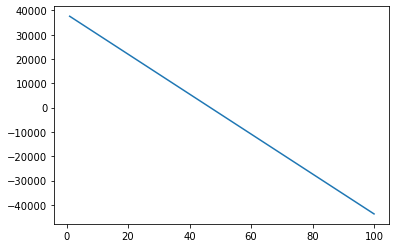

In [114]:
plt.plot(new_input, yhat)
plt.show()

### `Decision Making: Determining a Good Model Fit`
<b>
Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

What is a good R-squared value?
When comparing models, the model with the higher R-squared value is a better fit for the data.

What is a good MSE?
When comparing models, the model with the smallest MSE value is a better fit for the data.
    </b>
    
**`Let's take a look at the values for the different models.`**

**Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.**
- R-squared: 0.49659118843391759
- MSE: 3.16 x10^7
    
**Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.**
- R-squared: 0.80896354913783497
- MSE: 1.2 x10^7

**Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.**
- R-squared: 0.6741946663906514
- MSE: 2.05 x 10^7

**`Simple Linear Regression model (SLR) vs Multiple Linear Regression model (MLR)`**
**Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and or even act as noise. As a result, you should always check the MSE and R^2.**

**So to be able to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.**

- MSE: The MSE of SLR is 3.16x10^7 while MLR has an MSE of 1.2 x10^7. The MSE of MLR is much smaller.
- R-squared: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (0.497) is very small compared to the R-squared for the MLR (0.809).

**This R-squared in combination with the MSE show that MLR seems like the better model fit in this case, compared to SLR.**

**`Simple Linear Model (SLR) vs Polynomial Fit`**

- MSE: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.
- R-squared: The R-squared for the Polyfit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.

**Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting Price with Highway-mpg as a predictor variable.**

**`Multiple Linear Regression (MLR) vs Polynomial Fit`**
- MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
- R-squared: The R-squared for the MLR is also much larger than for the Polynomial Fit.

### R-Squared in combination with the MSE show that MLR seems like the better model fit in this case, compared to SLR and Polynomial Fit.

## `Model Evaluation and Refinement`
<br>
<b>
     In the previous section, we have evalulated the model using in-sample evaluation. <code>In-sample evaluation tells us how well our model fits the data already given to train it. It does not give us an estimate of how well the train model can predict new data.</code> The solution is to split our data up, use the in-sample data or training data to train the model. The rest of the data, called Test Data, is used as out-of-sample data. This data is then used to approximate, how the model performs in the real world. Separating data into training and testing sets is an important part of model evaluation. We use the test data to get an idea how our model will perform in the real world.
</b>    

**`Functions for Plotting`**

In [115]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title): # red function : actual, Blue Function : predicted
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.legend([RedName,BlueName])

    plt.show()
    plt.close()

In [116]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'or', label='Training Data')
    plt.plot(xtest, y_test, 'og', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

### `Part 1: Training and Testing`

**An important step in testing your model is to split your data into training and testing data.**

In [117]:
# We will place the target data price in a separate dataframe y:
y_data = df['price'] 

#drop price data in x data
x_data = df.drop('price',axis=1)

**Now we randomly split our data into training and testing data using the function train_test_split.**

In [118]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 21
number of training samples: 180


**The test_size parameter sets the proportion of data that is split into the testing set. In the above, the testing set is set to 10% of the total dataset.**

**Let's Calculate the R^2 on the test data (x_train, x_test, y_train, y_test):**

In [119]:
# let's import LinearRegression from the module linear_model.
from sklearn.linear_model import LinearRegression

#We create a Linear Regression object:
lre=LinearRegression()

#we fit the model using the feature horsepower
lre.fit(x_train[['horsepower']], y_train)

# Let's Calculate the R^2 on the test data:
test =  lre.score(x_test[['horsepower']], y_test)
print('the R^2 on the Test data:', test)

# Let's Calculate the R^2 on the Train data:
train = lre.score(x_train[['horsepower']], y_train)
print('the R^2 on the Train data:', train)

the R^2 on the Test data: 0.3635480624962414
the R^2 on the Train data: 0.662028747521533


**we can see the R^2 is much smaller using the test data. This is because almost 90% of the data is used to train the model becuase of which the model is able of explain 66% of the seen data(i.e. 90% of the total data) and only 10% of the data to test it because of which it can explain only 36% of that unseen 10% data. In short, the model has good accuracy  but very low precision.**

**Now, let's split up the data set such that 40% of the data samples will be utilized for testing, set the parameter "random_state" equal to zero. The output of the function should be the following: "x_train_1" , "x_test_1", "y_train_1" and "y_test_1"**

In [120]:
 x_train1,x_test1, y_train1,  y_test1 = train_test_split(x_data, y_data,test_size=0.4, random_state=0 )
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

# training model and calculating R^2
lre1=LinearRegression()
lre1.fit(x_train1[['horsepower']], y_train1)
# Let's Calculate the R^2 on the test data:
test1 =  lre1.score(x_test1[['horsepower']], y_test1)
print('the R^2 on the Test data:', test1)

# Let's Calculate the R^2 on the Train data:
train1 = lre1.score(x_train1[['horsepower']], y_train1)
print('the R^2 on the Train data:', train1)

number of test samples : 81
number of training samples: 120
the R^2 on the Test data: 0.7139737368233015
the R^2 on the Train data: 0.5754853866574969


**We can see a big jump precision to 71% from 36% and slight drop in accuracy from 66% to 57%. But this model can predict real world data more precisely.**

### `Cross-validation Score`

**Sometimes you do not have sufficient testing data; as a result, you may want to perform Cross-validation. Let's go over several methods that you can use for Cross-validation.**

In [121]:
# Lets import model_selection from the module cross_val_score.
from sklearn.model_selection import cross_val_score

# We input the object, the feature in this case ' horsepower', the target data (y_data).
# The parameter 'cv' determines the number of folds; in this case 4.
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

# The default scoring is R^2; each element in the array has the average R^2 value in the fold:
Rcross

array([0.77465419, 0.51718424, 0.74814454, 0.04825398])

**We can calculate the average and standard deviation of our estimate:**

In [122]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.5220592359225413 and the standard deviation is 0.29130480666118463


**You can also use the function `cross_val_predict` to predict the output. The function splits up the data into the specified number of folds, using one fold for testing and the other folds are used for training. First import the function:**

In [123]:
from sklearn.model_selection import cross_val_predict

**We input the object, the feature in this case `horsepower` , the target data y_data. The parameter `cv` determines the number of folds; in this case 4. We can produce an output that was obtained for each element when it was in the test set.:**

In [124]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5] # yhat has total 201 values

array([14142.23793549, 14142.23793549, 20815.3029844 , 12745.549902  ,
       14762.9881726 ])

### `Part 2: Overfitting, Underfitting and Model Selection`

**It turns out that the test data sometimes referred to as the out of sample data is a much better measure of how well your model performs in the real world. One reason for this is overfitting; let's go over some examples. It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.**

**Let's create Multiple linear regression objects and train the model using 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg' as features.**

In [125]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train) # 10% test data

LinearRegression()

**Prediction using training data:**

In [126]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]) 
yhat_train[0:5]

array([ 7426.34910902, 28324.42490838, 14212.74872339,  4052.80810192,
       34499.8541269 ])

**Let's perform some model evaluation using our training and testing data separately.**

C:\Users\sree_chandra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\sree_chandra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


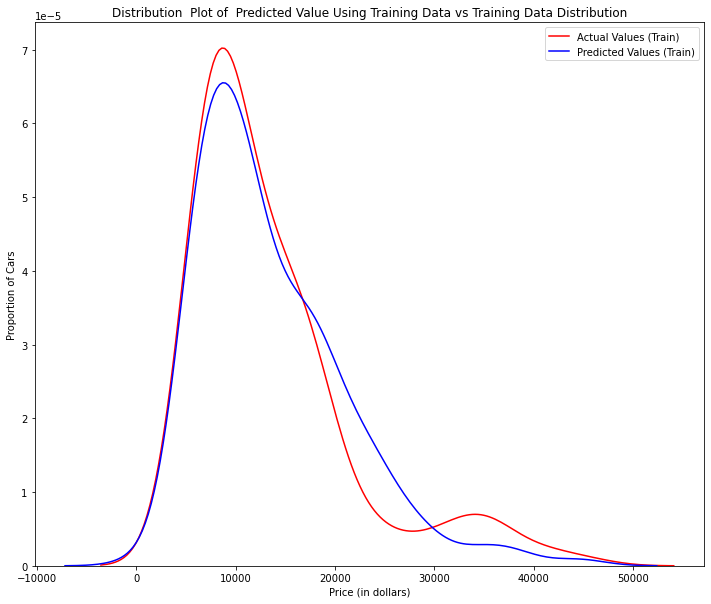

In [127]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution' 
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title) 

**Figur 2: Plot of predicted value using the test data compared to the test data.**

**Comparing Figure 1 and Figure 2; it is evident the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent where the ranges are from 5000 to 15 000. This is where the distribution shape is exceptionally different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.**

### `Overfitting`
**Overfitting occurs when the model fits the noise, not the underlying process. Therefore when testing your model using the test-set, your model does not perform well as it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.**

**Let's use 55 percent of the data for training and the rest for testing:**

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

**We will perform a degree 5 polynomial transformation on the feature 'horse power'.**

In [129]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])  
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

**Now let's create a linear regression model `poly` and train it.**

In [130]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

**We can see the output of our model using the method `predict.` then assign the values to `yhat`.**

In [131]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6727.50119227,  7306.62964914, 12213.64930866, 18895.18219039,
       19997.01049579])

**Let's take the first five predicted values and compare it to the actual targets.**

In [132]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6727.50119227  7306.62964914 12213.64930866 18895.18219039]
True values: [ 6295. 10698. 13860. 13499.]


**We will use the function `PollyPlot` that we defined at the beginning of the section to display the training data, testing data, and the predicted function.**

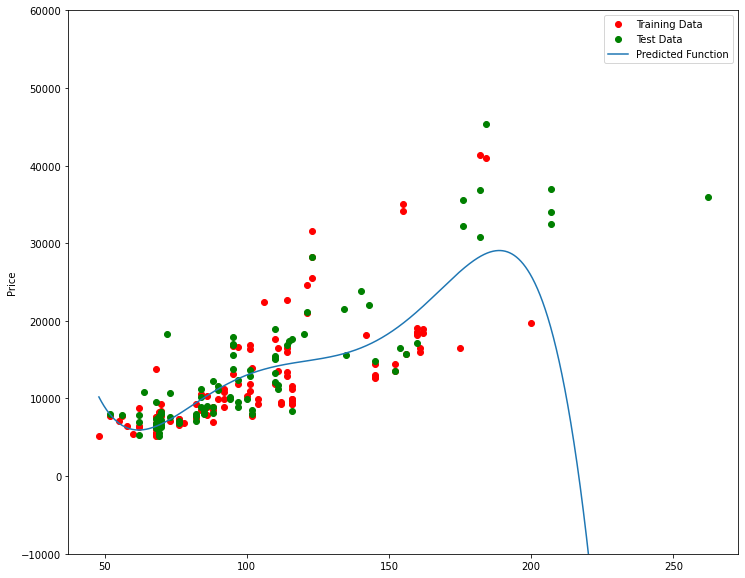

In [133]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

<b>Figur 4 A polynomial regression model, red dots represent training data, green dots represent test data, and the blue line represents the model prediction.

We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points.

R^2 of the training data:</b>

In [134]:
poly.score(x_train_pr, y_train)

0.5568527852106651

**R^2 of the test data:**

In [135]:
poly.score(x_test_pr, y_test)

-29.815107182507774

**We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87. The lower the R^2, the worse the model, a Negative R^2 is a sign of overfitting.**

**Let's see how the R^2 changes on the test data for different order polynomials and plot the results:**

Text(3, 0.75, 'Maximum R^2 ')

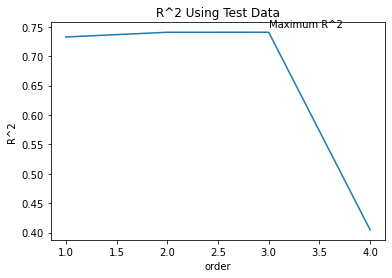

In [136]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

**We see the R^2 gradually increases until an order three polynomial is used. Then the R^2 dramatically decreases at four.**

**Let's define a function f which takes two inputs, 1. order of polynomial and 2. % of test data, The functon f will be served to interact for creating interacting visuals.**

In [137]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

**The following interface allows you to experiment with different polynomial orders and different amounts of data.**

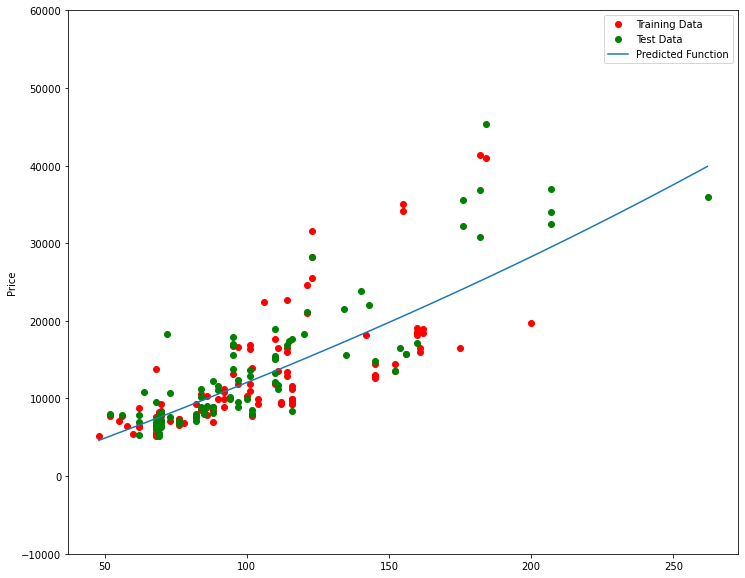

<function __main__.f(order, test_data)>

In [138]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

**Let's perform polynomial transformation with more than one feature - 'horsepower', 'curb-weight', 'engine-size', 'highway-mpg' and degree 2**

How many dimensions does the new feature have? (110, 15)


C:\Users\sree_chandra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\sree_chandra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


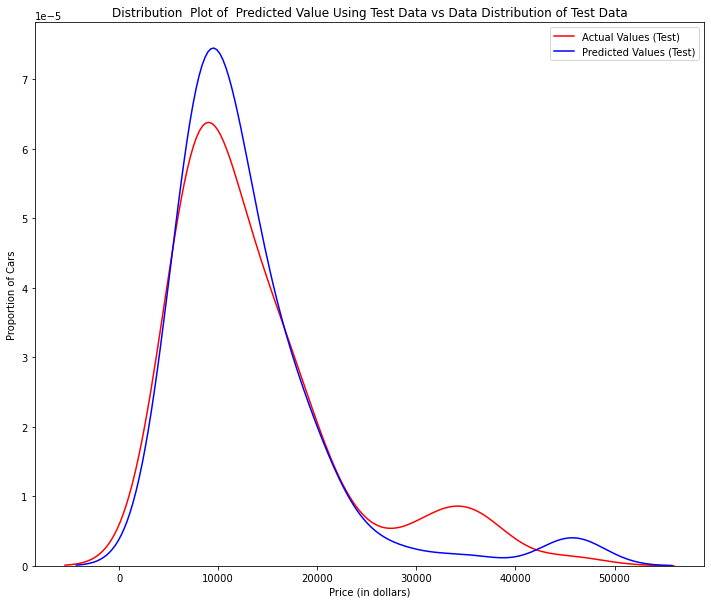

In [139]:
pr1 = PolynomialFeatures(degree = 2)

# Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'
x_train_pr1 = pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1 = pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

print('How many dimensions does the new feature have?', x_train_pr1.shape)

# Create a linear regression model "poly1" and train the object using the method "fit" using the polynomial features
poly1=LinearRegression().fit(x_train_pr1,y_train)

# Use the method "predict" to predict an output on the polynomial features, 
# then use the function "DistributionPlot" to display the distribution of the predicted output vs the test data
yhat_test1 = poly1.predict(x_test_pr1)
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

The predicted value is higher than actual value for cars where the price $10,000 range,

conversely the predicted price is lower than the price cost in the $30,000 \ to \ $40,000 range.

As such the model is not as accurate in these ranges

### `Part 3: Ridge regression`

<b>In this section, we will review Ridge Regression we will see how the parameter `Alfa` changes the model. Just a note here our test data will be used as validation data.

Let's perform a degree two polynomial transformation on our data.</b>

In [140]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

**Let's import Ridge from the module linear models.**

In [141]:
from sklearn.linear_model import Ridge

**check the predicted and test values obtained by ridge model**

In [142]:
# Let's create a Ridge regression object, setting the regularization parameter to 0.1
RigeModel=Ridge(alpha=0.1)

# Like regular regression, you can fit the model using the method fit.
RigeModel.fit(x_train_pr, y_train)

# Similarly, you can obtain a prediction:
yhat = RigeModel.predict(x_test_pr)

# Let's compare the first five predicted samples to our test set
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6569.10080596  9595.9695303  20834.19869602 19347.43557722]
test set : [ 6295. 10698. 13860. 13499.]


C:\Users\sree_chandra\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.02972e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


**We select the value of Alpha that minimizes the test error, for example, we can use a for loop.**

In [143]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
for alpha in Alpha:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

**We can plot out the value of R^2 for different Alphas**

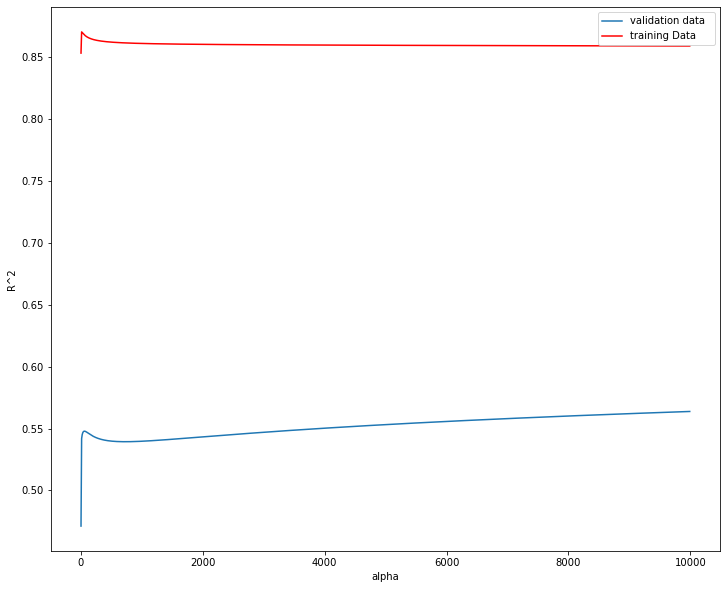

In [144]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

<b>
    Figure 6:The blue line represents the R^2 of the validation data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alpha.

Here the model is built and tested on the same data. So the training and test data are the same.

The red line in figure 6 represents the R^2 of the training data.
As Alpha increases the R^2 decreases.
Therefore as Alpha increases the model performs worse on the training data.

The blue line represents the R^2 on the validation data.
As the value for Alpha increases the R^2 increases and converges at a point
    </b>

# `Part 4: Grid Search`

<b>The term Alfa is a hyperparameter, sklearn has the class GridSearchCV to make the process of finding the best hyperparameter simpler.

Let's import GridSearchCV from the module model_selection.</b>

In [145]:
from sklearn.model_selection import GridSearchCV

**We create a dictionary of parameter values:**

In [146]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [147]:
# Create a ridge regions object:
RR=Ridge()

# Create a ridge grid search object
Grid1 = GridSearchCV(RR, parameters1,cv=4)

# Fit the model
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

**The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:**

In [148]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

**We now test our model on the test data**

In [149]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.841178138779323

**We now test our model on the training data**

In [150]:
BestRR.score(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

0.7678682438637905

**Let's visualize our model wihh alpha = 10000**


C:\Users\sree_chandra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\sree_chandra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


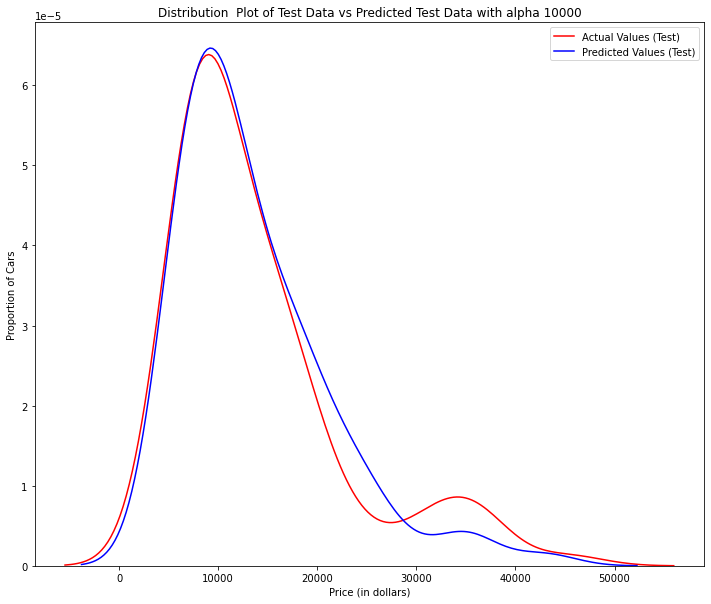

In [151]:
yhat = BestRR.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
Title='Distribution  Plot of Test Data vs Predicted Test Data with alpha 10000'

DistributionPlot(y_test, yhat, "Actual Values (Test)", "Predicted Values (Test)", Title)

## `Conclusion`

<b><code>Our model with the inputs - ('horsepower', 'curb-weight', 'engine-size', 'highway-mpg') can predict the Price of the second hand car with the efficiency of 84%</code></b>

In [159]:
#location,sqft,bath,bhk):
#location,horsepower,curb-weight,engine-size,highway-mpg
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = horsepower
    x[1] = curb-weight
    x[2] = engine-size
    x[3] = highway-mpg
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [154]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [160]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

C:\Users\sree_chandra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\sree_chandra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


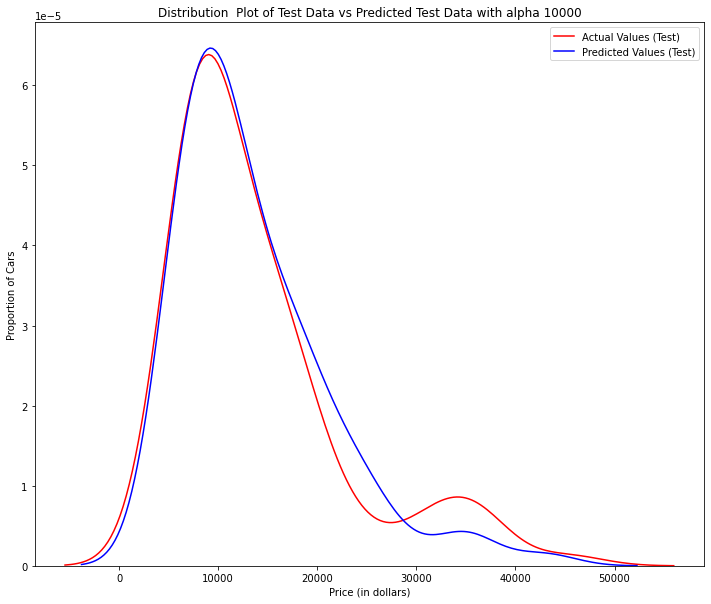

In [161]:
from sklearn.model_selection import GridSearchCV
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1
# Create a ridge regions object:
RR=Ridge()

# Create a ridge grid search object
Grid1 = GridSearchCV(RR, parameters1,cv=4)

# Fit the model
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

BestRR=Grid1.best_estimator_
BestRR

BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

BestRR.score(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

yhat = BestRR.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
Title='Distribution  Plot of Test Data vs Predicted Test Data with alpha 10000'

DistributionPlot(y_test, yhat, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [162]:
df_main = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','price']].copy()

In [163]:
df_main 

,horsepower,curb-weight,engine-size,highway-mpg,price
0,111,2548,130,27,13495.0
1,111,2548,130,27,16500.0
2,154,2823,152,26,16500.0
3,102,2337,109,30,13950.0
4,115,2824,136,22,17450.0
...,...,...,...,...,...
196,114,2952,141,28,16845.0
197,160,3049,141,25,19045.0
198,134,3012,173,23,21485.0
199,106,3217,145,27,22470.0


In [164]:
### Independent and Dependent features
X=df_main .iloc[:,:-1]
y=df_main .iloc[:,-1]
    

In [167]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [169]:
from sklearn.linear_model import Ridge
# Let's create a Ridge regression object, setting the regularization parameter to 0.1
RigeModel=Ridge(alpha=10000)

# Like regular regression, you can fit the model using the method fit.
RigeModel.fit(X_train, y_train)

# Similarly, you can obtain a prediction:
y_pred = RigeModel.predict(X_test)

# Let's compare the first five predicted samples to our test set
print('predicted:', y_pred[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 5016.66767877 10830.09362006 20812.55979854 20781.02963563]
test set : [ 6295. 10698. 13860. 13499.]


In [170]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("RigeModel.pkl","wb")
pickle.dump(RigeModel, pickle_out)
pickle_out.close()

In [175]:
RigeModel.predict([[115,2824,136,22]])

C:\Users\sree_chandra\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([15595.69753758])

In [176]:
BestRR.score(X_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8372283251622465